# Gaussian Mixture Models:

* The simplicity of k-means leads to practical challenges in its applications.
    * In particular, the nonprobabilistic nature of k-means and its use of simple distance from cluster center to assign cluster membership leads to poor performance for many real-world situations.

* Gaussian Mixture Models:
    * Can be viewed as an extension of the ideas of k-means, but can also be powerful tool for estimation beyond simple clustering.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# A. Weaknesses of k-Means:

* If we have simple blobs of data, the k-means algorithm can quickly label those clusters in a way that closely matches what we might do by eye.
* From an intuitive standpoint, we might expect that the clustering assignment for some points is more certain than others:
    * Unfortunately, the k-means model has no intrinsic measure of probability or uncertainty of cluster assignments (although it may be possible to use a bootstrap approach to estimate this uncertainty). For this, we must think about generalizing the model.

* One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hypersphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.
    * This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster.

* k-Means has no built-in way of accounting for oblong or elliptical clusters.

In [3]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


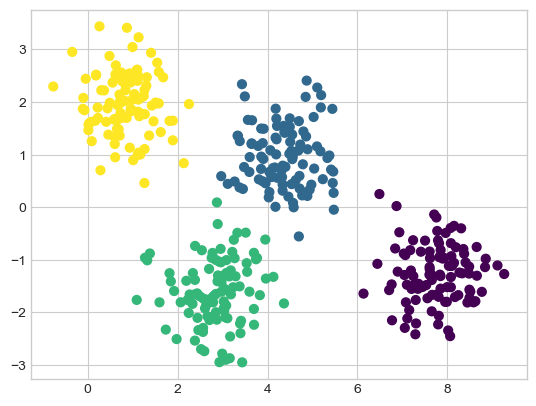

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray', lw=3, alpha=0.5, zorder=1))

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


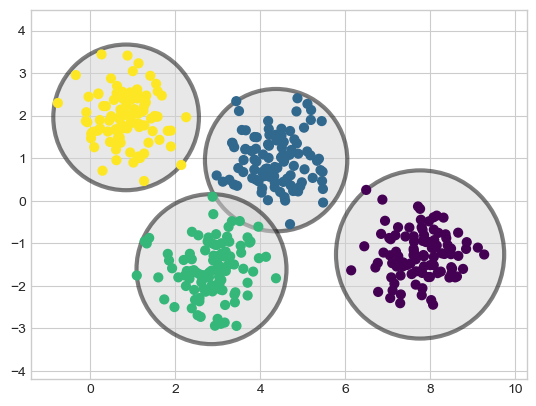

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


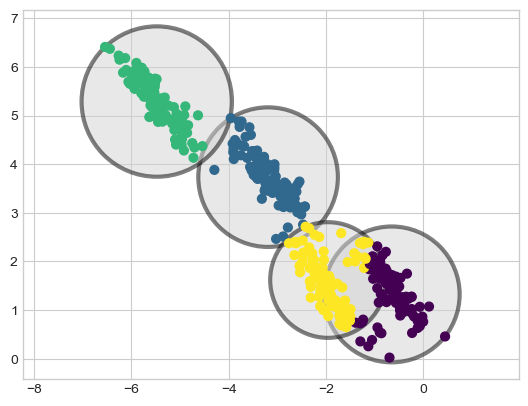

In [7]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)

plot_kmeans(kmeans, X_stretched)

# B. Generalizing E-M: Gaussian Mixture Models

* A Gaussian mixture model (GMM) attempts to find a mixture of multidimensional Gaussian probability distributions that best model any input dataset. 
    * In the simplest case, GMMs can be used for finding clusters in the same manner as k-means. 

* Because a GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments:
    * In `sklearn`, this is done using the `predict_proba` method.
    * This returns a matrix of size `[n_samples, n_clusters]` which measures the probability that any point belongs to the given cluster.
    * We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction.

* Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach, which qualitatively does the following:
    1. Choose starting guesses for the location and shape.
    2. Repeat until converged:
        1. $E-step$: For each point, find weights encoding the probability of membership in each cluster.
        2. $M-step$: For each cluster, update its location, normalization, and shape based on all data points, making use of the weights.

    * The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model.
    * Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


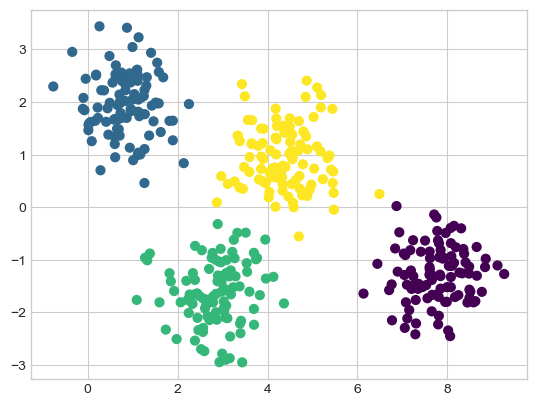

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [9]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.463 0.    0.    0.537]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


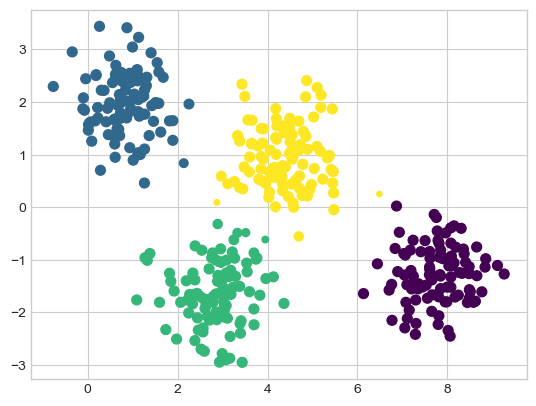

In [12]:
size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [15]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\456771263.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


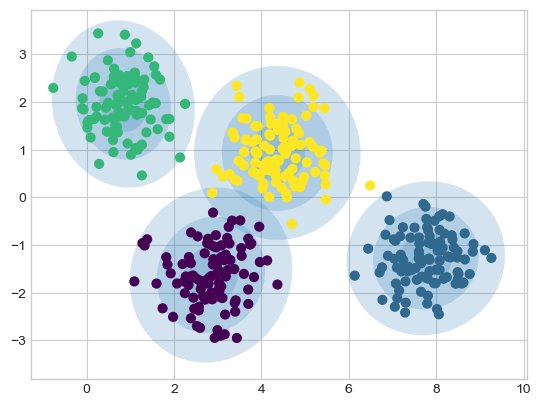

In [16]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\456771263.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


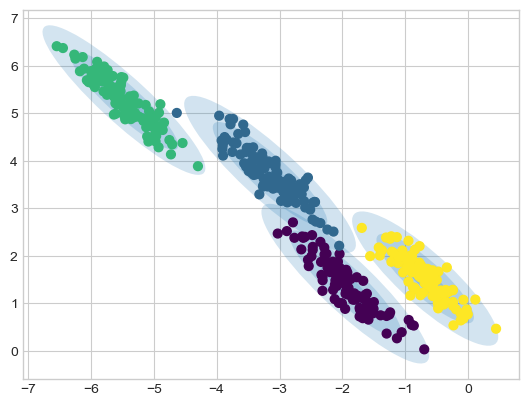

In [17]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

# C. Choosing the Covariance Type:

* `covariance_type`:
    * This hyperparameter controls the degrees of freedom in the shape of each cluster; it's essential to set this carefully for any given problem.
    * `covariance_type="diag"`:
        * Default, w/c means that the size of the cluster along each dimension can be set independently, w/ the resulting ellipse constrained to align w/ the axes.
    * `covariance_type="diag"`:
        * slightly simpler and faster model, which constrains the shape of the cluster such that all dimensions are equal.
        * The resulting clustering will have similar characteristics to that of k-means, though it’s not entirely equivalent.

    * `covariance_type="full"`:
        * Allows each cluster to be modeled as an ellipse with arbitrary orientation.
        * A more complicated and computationally expensive model (especially as the number of dimensions grows).

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\1319859298.py:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\1319859298.py:22: MatplotlibDeprecatio

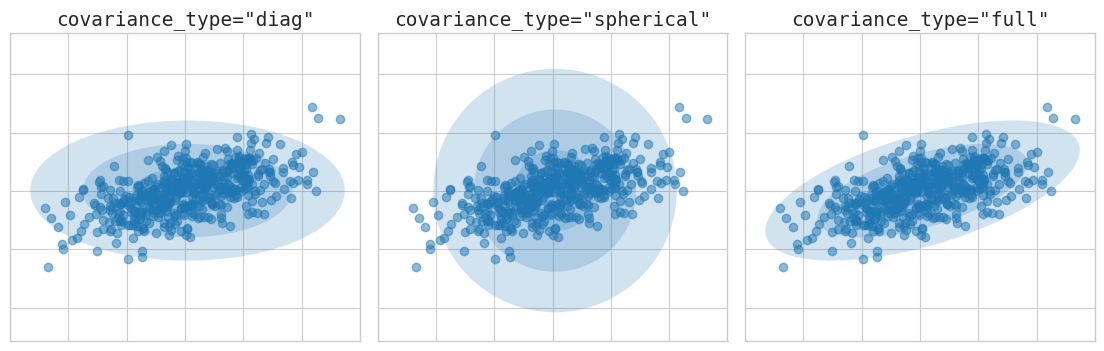

In [18]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance.shape == (2,):
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(wspace=0.05)

rng = np.random.RandomState(5)
X = np.dot(rng.randn(500, 2), rng.randn(2, 2))

for i, cov_type in enumerate(['diag', 'spherical', 'full']):
    model = GaussianMixture(1, covariance_type=cov_type).fit(X)
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax[i].set_xlim(-3, 3)
    ax[i].set_title('covariance_type="{0}"'.format(cov_type),
                    size=14, family='monospace')
    
    draw_ellipse(model.means_[0], model.covariances_[0], ax[i], alpha=0.2)
    ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax[i].yaxis.set_major_formatter(plt.NullFormatter())


# E. Gaussian Mixture Models as Density Estimation:

* Though the GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation.
    * That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.
    * The GMM gives us the recipe to generate new random data distributed similarly to our input.

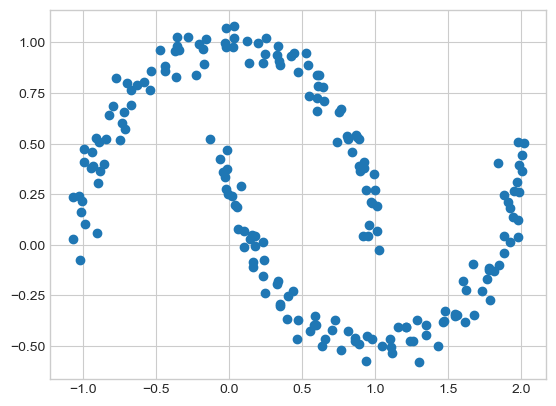

In [19]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\1319859298.py:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


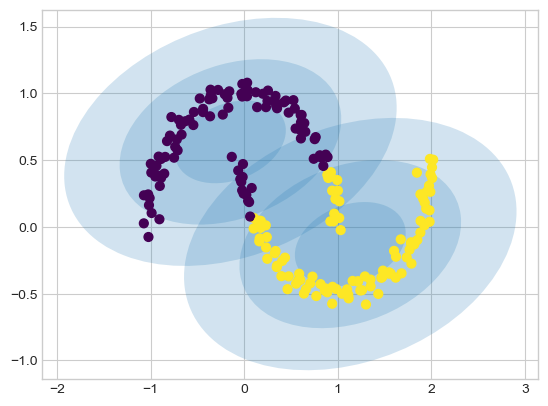

In [20]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JCA\AppData\Local\Temp\ipykernel_15560\1319859298.py:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


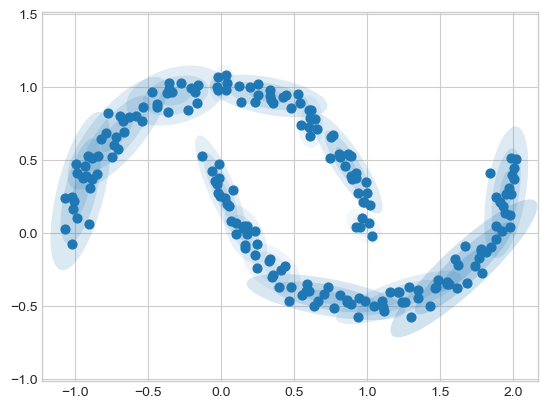

In [21]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

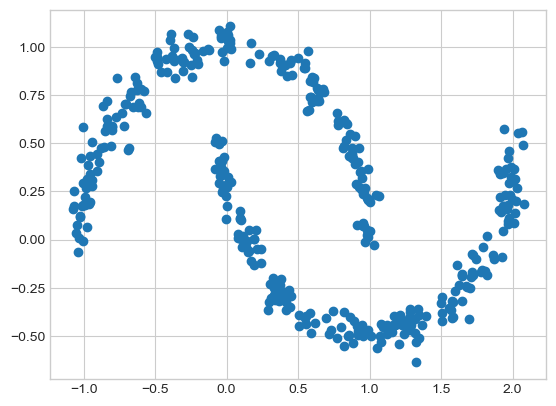

In [23]:
Xnew, ynew = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);